# 1. Problem Statement

#### Principal Component Analysis (PCA)

Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. 

The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. 

<br>The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data.

# 2. Data Collection

## 2.1 Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import zscore

## 2.2 Importing Dataset

In [2]:
df_pop = pd.read_csv("PCA_India_Data_Census.csv") #reading_the_dataset

In [3]:
#copying the dataset
df_c = df_pop.copy()

In [4]:
#checking the top 5 entries
df_pop.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [5]:
#checking the tail of the dataset
df_pop.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


# 3. Data Preparation

## 3.1 Information of the dataset

In [6]:
#Information of the dataset
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

## 3.2 Summary of the dataset

In [9]:
#summary of the dataset
df_pop.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


## 3.3 Duplicate Records

In [10]:
#checking duplicated entries in the dataset
df_pop.duplicated().sum()

0

## 3.4 Missing Values

In [14]:
#checking null values in the dataset
df_pop.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

## 3.5 Outliers

In [22]:
#dropping columns other than not usefull for PCA
df_pca = df_pop.drop(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH'], axis=1)

In [23]:
#no of features for PCA
len(df_pca.columns)

56

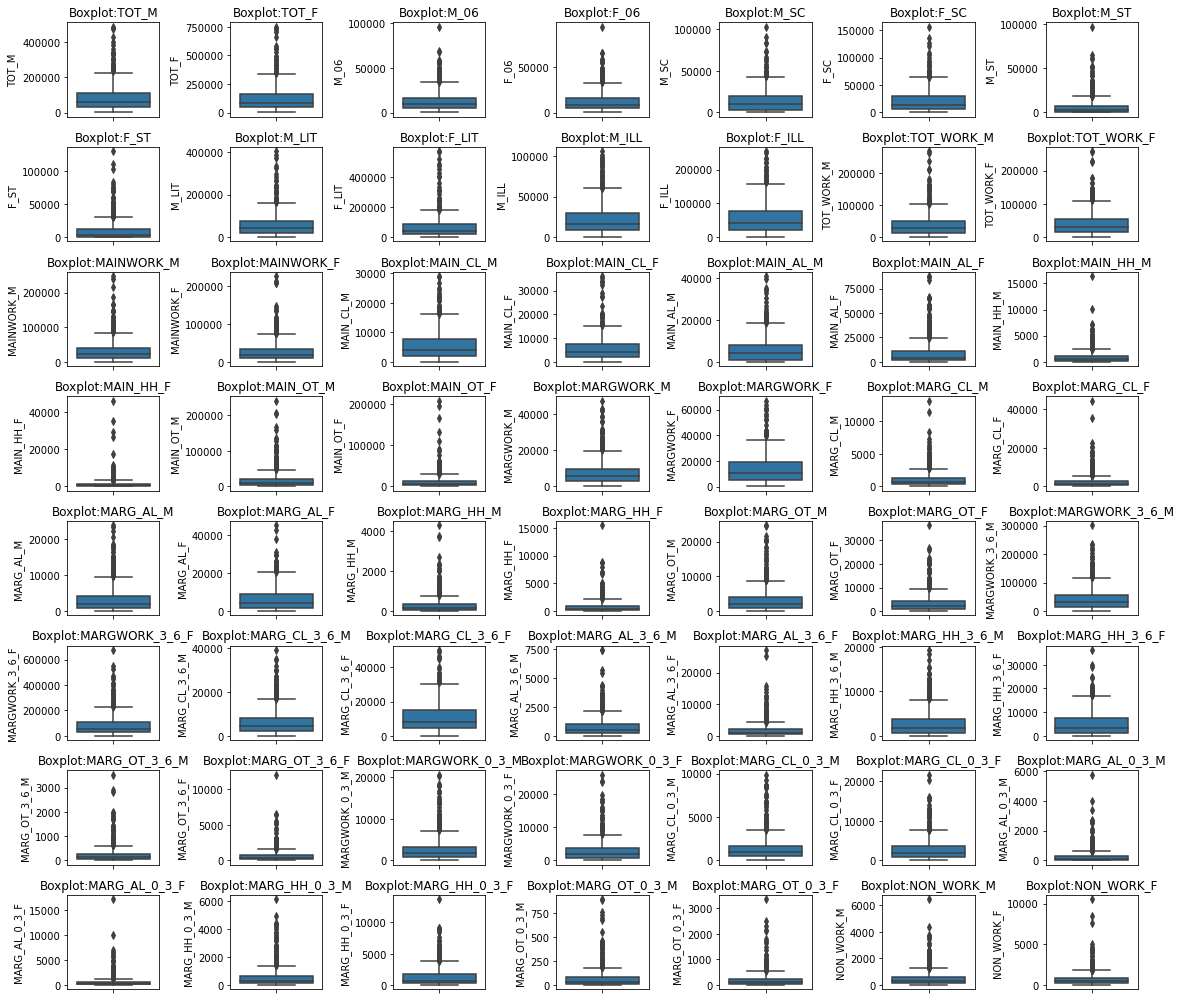

In [24]:
#checking for outlier in the dataset
plt.figure(figsize=(16,14))
feat_list = df_pca.columns
for i in range(len(feat_list)):
    plt.subplot(8,7,i+1)
    sns.boxplot(y=df_pca[feat_list[i]], data=df_pca)
    plt.title('Boxplot:{}'.format(feat_list[i]))
    plt.tight_layout()

In [25]:
#funcion to return upper and lower limit to detect outliers for all features
def remove_outlier(c):
    Q1, Q3=c.quantile([0.25,0.75])
    IQR=Q3-Q1
    LR=Q1-(1.5*IQR)
    UR=Q3+(1.5*IQR)
    return LR, UR

In [28]:
#capture each feature and treating the outlier beyond boundaries
for i in feat_list:
    L_limit, U_limit=remove_outlier(df_pca[i])
    df_pca[i]=np.where(df_pca[i]>U_limit, U_limit, df_pca[i])
    df_pca[i]=np.where(df_pca[i]<L_limit, L_limit, df_pca[i])

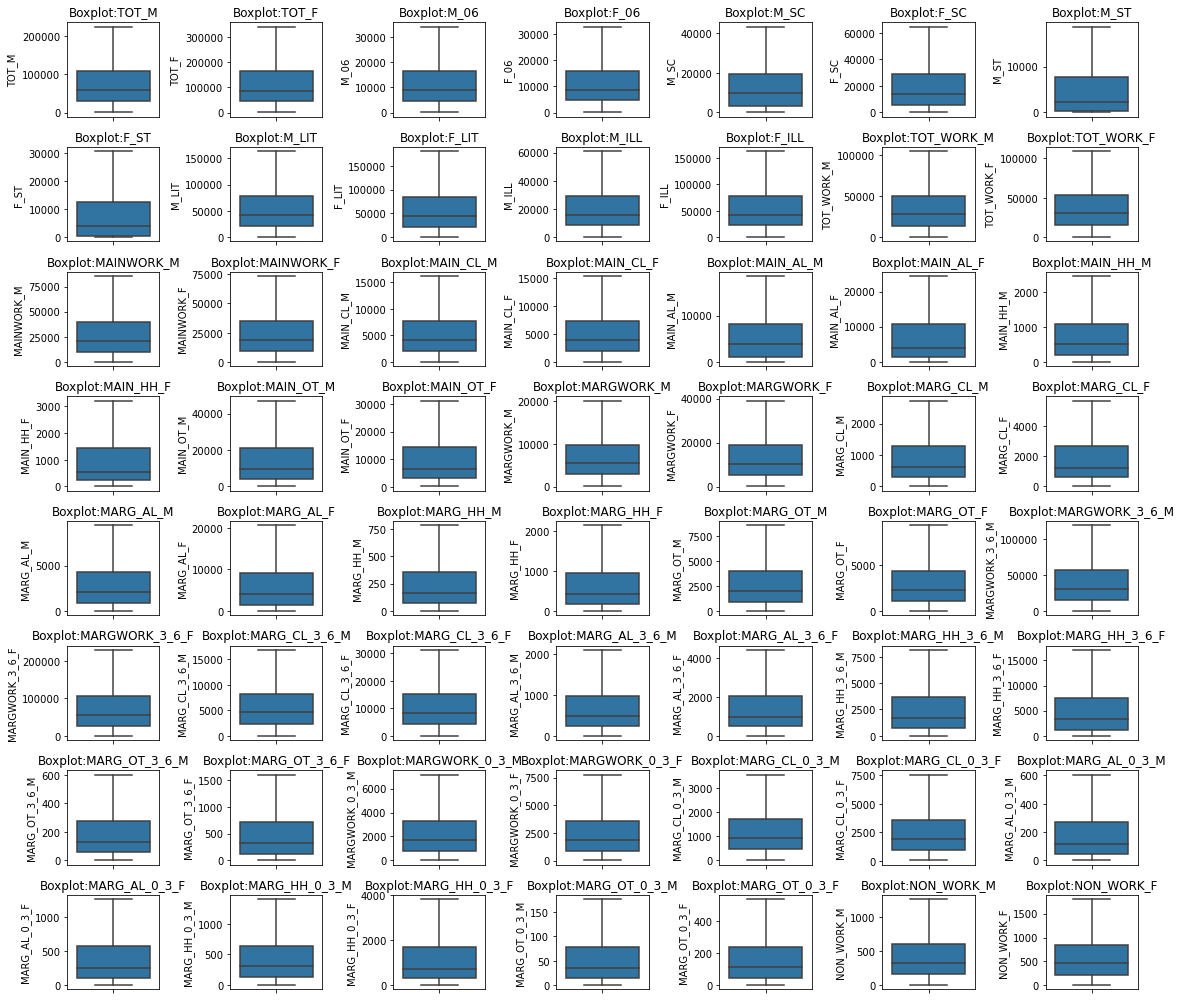

In [29]:
#checking the outliers have been trreated
plt.figure(figsize=(16,14))
feat_list = df_pca.columns
for i in range(len(feat_list)):
    plt.subplot(8,7,i+1)
    sns.boxplot(y=df_pca[feat_list[i]], data=df_pca)
    plt.title('Boxplot:{}'.format(feat_list[i]))
    plt.tight_layout()

# 4. Exploratory Data Analysis

### Which state has highest gender ratio and which has the lowest?

In [15]:
df_n=df_pop.iloc[:, 2:9]  #taking 5 features 
df_n

,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06
0,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196
1,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733
2,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018
3,Jammu & Kashmir,Kargil,1320,2784,4206,563,677
4,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587
...,...,...,...,...,...,...,...
635,Puducherry,Mahe,3333,8154,11781,1146,1203
636,Puducherry,Karaikal,10612,12346,21691,1544,1533
637,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225
638,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664


In [16]:
df_n['TOT_GR']=df_n['TOT_M']/df_n['TOT_F']  #creating a column for Total Gender_Ratio
df_n['GR_06']=df_n['M_06']/df_n['F_06']     #column for Gender_Ratio of age group 0-6
df_n   

,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,TOT_GR,GR_06
0,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,0.784938,0.946094
1,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,0.847762,1.200643
2,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,0.597045,1.062868
3,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0.661912,0.831610
4,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,0.686802,1.124264
...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,3333,8154,11781,1146,1203,0.692131,0.952618
636,Puducherry,Karaikal,10612,12346,21691,1544,1533,0.569176,1.007175
637,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0.588973,1.008889
638,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0.649026,1.088855


In [17]:
# creating a pivot table State wise gender Ratio and sorting it in descending order
pd.pivot_table(df_n, 'TOT_GR', index=['State'], aggfunc=np.mean).sort_values(by='TOT_GR', ascending=False)

,TOT_GR
State,
Lakshadweep,0.868061
Haryana,0.777742
NCT of Delhi,0.766436
Uttar Pradesh,0.762436
Punjab,0.747843
Bihar,0.746294
Meghalaya,0.736105
Jammu & Kashmir,0.728013
Daman & Diu,0.702191


In [18]:
# creating a pivot table State wise gender Ratio considering Age group 0-6 and sorting it in descending order
pd.pivot_table(df_n, 'GR_06', index=['State'], aggfunc=np.mean).sort_values(by='GR_06', ascending=False)

,GR_06
State,
Haryana,1.166044
Punjab,1.144655
Chandigarh,1.143453
NCT of Delhi,1.128716
Uttarakhand,1.112626
Lakshadweep,1.083176
Jammu & Kashmir,1.078001
Himachal Pradesh,1.077095
Rajasthan,1.062975


**Observation**

- **Considering populations from all ages**
    - Lakhswadeep has the highest gender ratio of 0.86 which means there are 86 mens per 100 womens while Andra Pradesh has the lowest of 0.53 which means there are 53 mens per 100 womens

- **Population of Age between 0-6**
    - Haryana has the highest gender ratio of 1.16 which means there are 116 mens per 100 womens while Andaman & Nicobar Island has the lowest of 1.06 which means there are 106 mens per 100 womens

### **Which district has the highest & lowest gender ratio?**

In [19]:
# creating a pivot table District wise gender Ratio and sorting it in descending order
pd.pivot_table(df_n, 'TOT_GR', index=['Area Name'], aggfunc=np.mean).sort_values(by='TOT_GR', ascending=False)

,TOT_GR
Area Name,
Lakshadweep,0.868061
Badgam,0.847762
Mahamaya Nagar,0.847313
Dhaulpur,0.846911
Baghpat,0.844003
...,...
Baudh,0.451455
West Godavari,0.450076
Virudhunagar,0.449352


In [20]:
# creating a pivot table District wise gender Ratio considering the age group 0-6 and sorting it in descending order
pd.pivot_table(df_n, 'GR_06', index=['Area Name'], aggfunc=np.mean).sort_values(by='GR_06', ascending=False)

,GR_06
Area Name,
Samba,1.318776
Jammu,1.268102
Pithoragarh,1.253758
Mahendragarh,1.251514
Rewari,1.251050
...,...
Lower Subansiri,0.857692
Changlang,0.857305
Papum Pare,0.847979


**Observation**

- **Considering populations from all ages**
    - Lakhswadeep district has the highest gender ratio of 0.86 which means there are 86 mens per 100 womens while Krishna district has the lowest of 0.43 which means there are 43 mens per 100 womens

- **Population of Age between 0-6**
    - Samba District has the highest gender ratio of 1.31 which means there are 131 mens per 100 womens while East Kameng district has the lowest of 0.81 which means there are 81 mens per 100 womens

## Correlation 

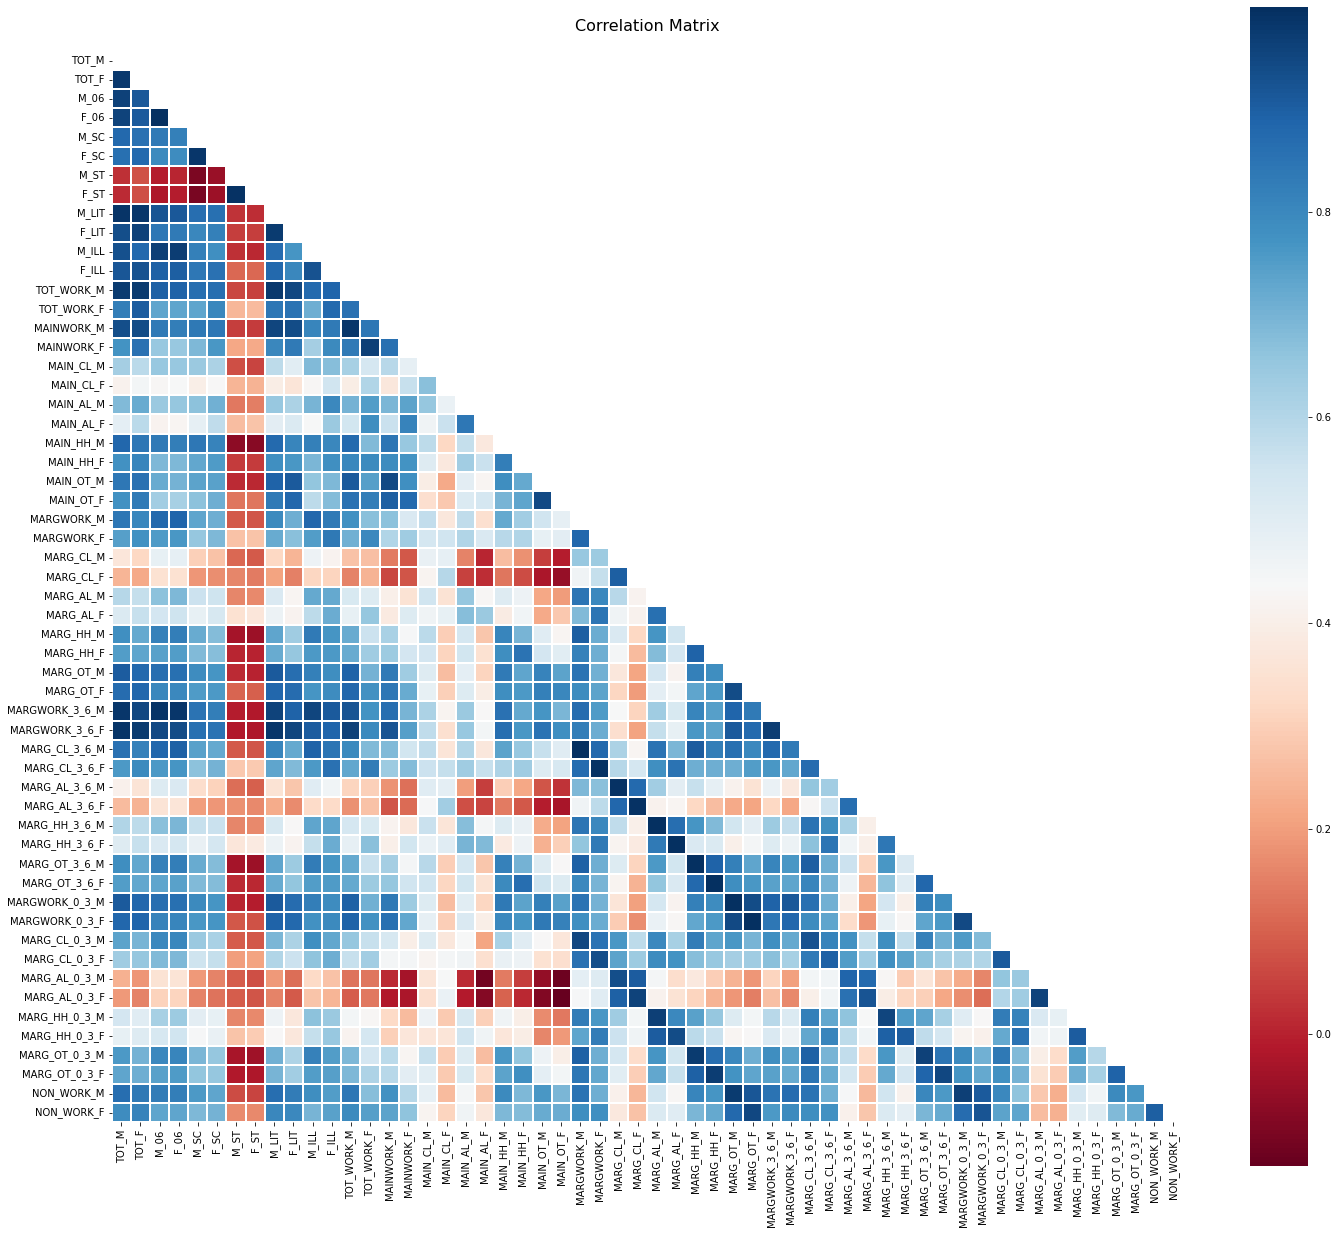

In [31]:
''' 
We have to bring out the correlation from the dataset so that we can take nessesary decision in 
imputation of the null values ad outlier treatment
'''
corr = df_pca.corr()                 # correlation matrix
triu_mask = np.triu(corr)           # taking one triangle from the plot

plt.figure(figsize=(24, 26))
sns.heatmap(
    corr,
    square=True,
    linewidths=2,
    annot=False,
    mask=triu_mask,  
    cbar_kws={"shrink": 0.82},
    cmap="RdBu",
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.show()

**Observation**
- There are multiple correlation in the dataset.
- Although there are multiple co relation in the dataset but we have to ensure that this data is ready for PCA or not. Because even, there are corelation there are some instances where 0.8 is considered as weak relation where as 0.6is considered as strong co relation. Hence we have to perform some statistical test to understand wheather the data is ready for PCA analysis

# 5. Data Preprocessing

## Scaling the data using z-score method

In [33]:
#scale the data

df_pca_scaled=df_pca.apply(zscore)

In [35]:
#data after scaling
df_pca_scaled.head()

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,-0.965904,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,-1.035363,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,-1.076382,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,-1.153941,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,-0.923645,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


## Statistical Significane of Correlation

Confirmation for statistical significance of co relation

$H$0: Corelaion are not significant, 
<br>$H$1: Corelation are significant

Reject $H$0: if p < 0.05

In [36]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

    Correlation are not much significant

In [37]:
#confirm the adequency of the sample size
#Note: Above kmo_model > 0.7 is Good and <0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

C:\Users\Sourav-LP\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9337447829429731

# 6. Model Building

## Applying PCA

In [38]:
#Applying PCA taking all features
from sklearn.decomposition import PCA
pca=PCA(n_components=56, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

## Covariance Matrix

In [39]:
#covariance matrix
cov_mat = np.cov(df_pca_scaled.T)
cov_mat

array([[1.00156495, 0.98012187, 0.9650436 , ..., 0.7328315 , 0.86616581,
        0.79071666],
       [0.98012187, 1.00156495, 0.91441794, ..., 0.71187751, 0.83964667,
        0.81464163],
       [0.9650436 , 0.91441794, 1.00156495, ..., 0.74206552, 0.82953569,
        0.73433345],
       ...,
       [0.7328315 , 0.71187751, 0.74206552, ..., 1.00156495, 0.76249106,
        0.72075284],
       [0.86616581, 0.83964667, 0.82953569, ..., 0.76249106, 1.00156495,
        0.90224595],
       [0.79071666, 0.81464163, 0.73433345, ..., 0.72075284, 0.90224595,
        1.00156495]])

## Eigen Vector

In [40]:
#extract eigen vector
pca.components_

array([[ 0.16057831,  0.15929556,  0.158156  , ...,  0.14344412,
         0.14932037,  0.14346462],
       [-0.08449106, -0.09673952, -0.0249065 , ...,  0.03020087,
        -0.05438733, -0.04319855],
       [-0.03540636,  0.0316356 , -0.07181385, ..., -0.09722086,
        -0.12348386, -0.02678847],
       ...,
       [-0.00728535,  0.02424941, -0.03364075, ..., -0.01154238,
         0.05605009, -0.00602087],
       [ 0.04607425,  0.00478559,  0.00527461, ...,  0.01408127,
        -0.07731306, -0.000511  ],
       [-0.00188768,  0.00480161,  0.00163996, ...,  0.00220353,
         0.00544754,  0.00098595]])

In [41]:
#extract eigen values for each PC
#Note:This is alawys returned in descendin order
pca.explained_variance_

array([3.48605689e+01, 7.54088416e+00, 3.72964431e+00, 2.75979210e+00,
       1.90665846e+00, 1.14732618e+00, 9.75643106e-01, 4.59998218e-01,
       3.96424031e-01, 3.20853208e-01, 2.72260483e-01, 2.35537025e-01,
       1.81356430e-01, 1.68458759e-01, 1.38527650e-01, 1.29370608e-01,
       1.01872275e-01, 9.43847737e-02, 8.57790022e-02, 7.74332083e-02,
       6.59441268e-02, 5.95665535e-02, 4.81500409e-02, 4.59506158e-02,
       4.26865206e-02, 3.11548344e-02, 2.85369984e-02, 2.70844133e-02,
       2.34086567e-02, 2.15675772e-02, 1.86817321e-02, 1.58696495e-02,
       1.21593696e-02, 1.11242870e-02, 9.73994594e-03, 7.68395473e-03,
       7.22817504e-03, 5.59312465e-03, 4.72111015e-03, 3.96078705e-03,
       2.58348932e-03, 2.14028242e-03, 1.93246386e-03, 1.48346312e-03,
       1.11651593e-03, 9.99057216e-04, 9.61825582e-04, 6.53163991e-04,
       5.78802142e-04, 4.38848586e-04, 3.71175209e-04, 3.10264351e-04,
       2.07936833e-04, 1.38295330e-04, 8.97070559e-05, 4.63307272e-05])

In [42]:
#extract explained variance for each PC
#Note:Explained Variance ratio = eigen values of each pcs/sum of all pcs
pca.explained_variance_ratio_

array([6.21537486e-01, 1.34448242e-01, 6.64967275e-02, 4.92049986e-02,
       3.39942733e-02, 2.04559551e-02, 1.73949761e-02, 8.20141912e-03,
       7.06793962e-03, 5.72056920e-03, 4.85419778e-03, 4.19944640e-03,
       3.23344752e-03, 3.00349182e-03, 2.46984286e-03, 2.30657976e-03,
       1.81630534e-03, 1.68280888e-03, 1.52937451e-03, 1.38057534e-03,
       1.17573373e-03, 1.06202644e-03, 8.58478686e-04, 8.19264607e-04,
       7.61068266e-04, 5.55467053e-04, 5.08793024e-04, 4.82894534e-04,
       4.17358584e-04, 3.84533533e-04, 3.33081106e-04, 2.82943807e-04,
       2.16792332e-04, 1.98337596e-04, 1.73655844e-04, 1.36999081e-04,
       1.28872875e-04, 9.97211677e-05, 8.41738110e-05, 7.06178271e-05,
       4.60616539e-05, 3.81596113e-05, 3.44543640e-05, 2.64490216e-05,
       1.99066316e-05, 1.78124320e-05, 1.71486202e-05, 1.16454183e-05,
       1.03196029e-05, 7.82433724e-06, 6.61777228e-06, 5.53177791e-06,
       3.70735593e-06, 2.46570077e-06, 1.59940873e-06, 8.26041704e-07])

## Co-efficient of all PCA

In [43]:
#creating a dataframe containing co-efficient of all pcs
df_e_load= pd.DataFrame(pca.components_.T, index=df_pca_scaled.columns)

## Plot to see the components

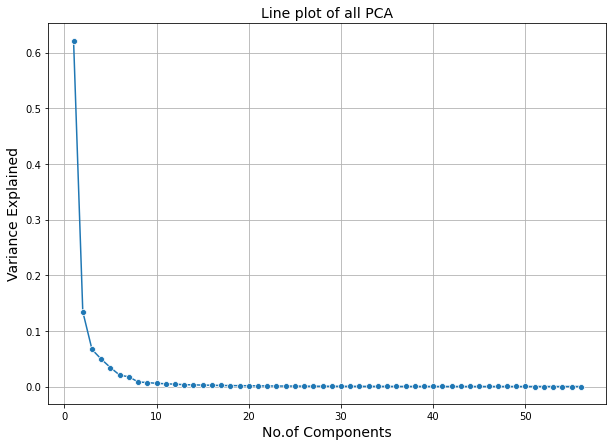

In [44]:
#creating a scree plot to see the maximum consumtion of the data
plt.figure(figsize=(10,7))
sns.lineplot(y=pca.explained_variance_ratio_, x=range(1,57), marker='o')
plt.xlabel('No.of Components', fontsize=14)
plt.ylabel('Variance Explained', fontsize=14)
plt.title('Line plot of all PCA', fontsize=14)
plt.grid()
plt.show()


- PC1 takes 62% of the data weightage, 
- PC2 13.4% and so on. 

So a cumulative explained ratio will give the reduction machanism

## Identifying the optimum number of PCs

In [45]:
#check the cumulative_explained_variance_ratio_ to find a cut off of the features
np.cumsum(pca.explained_variance_ratio_)

array([0.62153749, 0.75598573, 0.82248246, 0.87168745, 0.90568173,
       0.92613768, 0.94353266, 0.95173408, 0.95880202, 0.96452259,
       0.96937678, 0.97357623, 0.97680968, 0.97981317, 0.98228301,
       0.98458959, 0.9864059 , 0.98808871, 0.98961808, 0.99099866,
       0.99217439, 0.99323642, 0.9940949 , 0.99491416, 0.99567523,
       0.9962307 , 0.99673949, 0.99722238, 0.99763974, 0.99802427,
       0.99835736, 0.9986403 , 0.99885709, 0.99905543, 0.99922909,
       0.99936608, 0.99949496, 0.99959468, 0.99967885, 0.99974947,
       0.99979553, 0.99983369, 0.99986815, 0.99989459, 0.9999145 ,
       0.99993231, 0.99994946, 0.99996111, 0.99997143, 0.99997925,
       0.99998587, 0.9999914 , 0.99999511, 0.99999757, 0.99999917,
       1.        ])

90% of the dataset lies within 5 features, hence rest can be eliminated

In [46]:
#chose PCs based on selection of cumulative explained ratio
df_select=df_e_load[[0,1,2,3,4]]
df_select

,0,1,2,3,4
TOT_M,0.160578,-0.084491,-0.035406,0.055227,-0.042909
TOT_F,0.159296,-0.096740,0.031636,0.073689,-0.023481
M_06,0.158156,-0.024907,-0.071814,0.029100,-0.080750
F_06,0.158665,-0.018840,-0.065426,0.017082,-0.078716
M_SC,0.144680,-0.083961,-0.033374,0.012354,-0.168405
F_SC,0.144629,-0.090370,0.025229,0.019567,-0.158572
M_ST,0.019002,0.072230,0.324695,0.104353,0.416557
F_ST,0.017966,0.070688,0.339696,0.092920,0.414188
M_LIT,0.156312,-0.109926,-0.029379,0.091781,-0.014665
F_LIT,0.146201,-0.136307,-0.003277,0.128510,0.028461


## Comparing PCs with the actual columns

<AxesSubplot:>

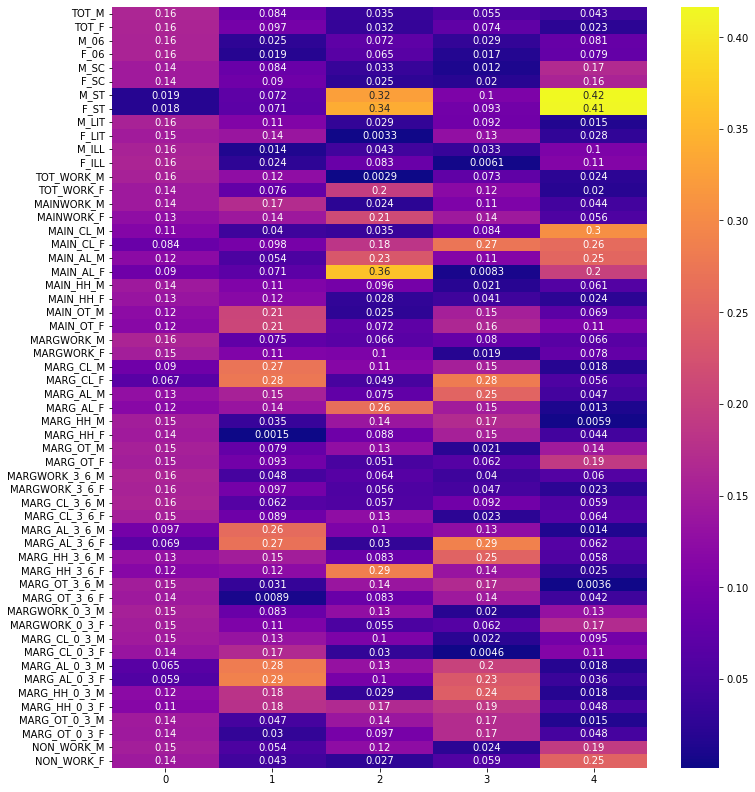

In [47]:
#comparing PCs with the actual columns
plt.figure(figsize=(12,14))
sns.heatmap(abs(df_select), annot=True, cmap='plasma')

Visualized the comparison with the original columns:

- Since PC1(0) has the highest weightage of 62%, there are multiple factors with highestest co-efficient of 0.16 which need to be checked in order to control the pollution.

- The PC2(1) which has the weightage of 13.4% has highest coefficient > 0.25 approx for both the genders of marginal agricultural & cultivator categories of populations
- The PC3(2) has 6.64% weightage to the dataset and has some highest co-efficient > 0.3 which contributes to categories of Marginal Agricultural populations & Schedule tribes population
- PC4(3) has the weigtage of 4.92% and has co-efficient > 0.25 which contributes to the female gender of Household industries & Agricultural Labourer Population.
- PC5 (4) contributes least as 3.39% and has co-efficient of > 0.4 which contributes to both the gender of Main Schedule Tribes

In [48]:
#Extract the required(as per the cumulative explained variance) no of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [49]:
pca_final_df = pd.DataFrame(pca_final, columns = df_select.columns)
pca_final_df.head()

,0,1,2,3,4
0,-5.428155,0.410273,-1.449690,-1.322526,0.383391
1,-5.386788,-0.145012,-1.963345,-1.797987,-0.000030
2,-7.390294,-0.188062,-0.254543,-0.002745,0.556746
3,-7.829331,-0.632966,-0.643132,-0.755823,0.276297
4,-5.080587,2.315884,-1.233491,1.002627,1.083351
